In [3]:
%load_ext autoreload
%autoreload 2

import cv2
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### 1- Autoencoder for Anomaly Detection

#### 1.1 First method for compiling model

In [7]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)
# print(x_train[0,:,:])
train_x = x_train.reshape(60000, 784) / 255
val_x = x_test.reshape(10000, 784) / 255
print(train_x.shape, val_x.shape)
# print(train_x[0,:])

(60000, 28, 28) (60000,)
(60000, 784) (10000, 784)


In [8]:
autoencoder = Sequential()
autoencoder.add(Dense(512, activation='elu', input_shape=(784,)))
autoencoder.add(Dense(128, activation='elu'))
autoencoder.add(Dense(10, activation='linear', name="bottleneck"))
autoencoder.add(Dense(128, activation='elu'))
autoencoder.add(Dense(512, activation='elu'))
autoencoder.add(Dense(784, activation='sigmoid'))
autoencoder.compile(loss='mean_squared_error', optimizer = Adam())
# trained_model: stores the training history
trained_model = autoencoder.fit(train_x, train_x, batch_size=1024, epochs=10, verbose=1, validation_data=(val_x, val_x))
encoder = Model(autoencoder.input, autoencoder.get_layer('bottleneck').output)
encoded_data = encoder.predict(train_x) # bottleneck representation
decoded_output = autoencoder.predict(train_x) # reconstruction
encoding_dim = 10

# return the decoder
encoded_input = Input(shape=(encoding_dim,))
decoder = autoencoder.layers[-3](encoded_input)
decoder = autoencoder.layers[-2](decoder)
decoder = autoencoder.layers[-1](decoder)
decoder = Model(encoded_input, decoder)

2021-10-16 20:39:53.301484: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/nccl2/lib:/usr/local/cuda/extras/CUPTI/lib64
2021-10-16 20:39:53.301590: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-10-16 20:39:53.301623: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (mengkai--test): /proc/driver/nvidia/version does not exist
2021-10-16 20:39:53.302133: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-10-16 20

Epoch 1/10
59/59 [==============================] - 5s 63ms/step - loss: 0.0763 - val_loss: 0.0512
Epoch 2/10
59/59 [==============================] - 4s 60ms/step - loss: 0.0440 - val_loss: 0.0374
Epoch 3/10
59/59 [==============================] - 3s 59ms/step - loss: 0.0346 - val_loss: 0.0311
Epoch 4/10
59/59 [==============================] - 3s 59ms/step - loss: 0.0295 - val_loss: 0.0273
Epoch 5/10
59/59 [==============================] - 3s 59ms/step - loss: 0.0266 - val_loss: 0.0251
Epoch 6/10
59/59 [==============================] - 4s 59ms/step - loss: 0.0246 - val_loss: 0.0233
Epoch 7/10
59/59 [==============================] - 4s 60ms/step - loss: 0.0231 - val_loss: 0.0220
Epoch 8/10
59/59 [==============================] - 4s 60ms/step - loss: 0.0218 - val_loss: 0.0209
Epoch 9/10
59/59 [==============================] - 4s 59ms/step - loss: 0.0208 - val_loss: 0.0199
Epoch 10/10
59/59 [==============================] - 4s 62ms/step - loss: 0.0199 - val_loss: 0.0192


#### 1.2 Second method for compiling model

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
train_x = x_train.reshape(60000, 784) / 255
val_x = x_test.reshape(10000, 784) / 255

input_img = Input(shape=(784,))
# autoencoder = Sequential()
autoencoder = Dense(512, activation='elu')(input_img)
autoencoder = Dense(128,  activation='elu')(autoencoder)
autoencoder = Dense(10,    activation='linear', name="bottleneck")(autoencoder)
autoencoder = Dense(128,  activation='elu')(autoencoder)
autoencoder = Dense(512,  activation='elu')(autoencoder)
autoencoder = Dense(784,  activation='sigmoid')(autoencoder)
autoencoder = Model(input_img, autoencoder)
autoencoder.compile(loss='mean_squared_error', optimizer = Adam())
trained_model = autoencoder.fit(train_x, train_x, batch_size=1024, epochs=10, verbose=1, validation_data=(val_x, val_x))
encoder = Model(autoencoder.input, autoencoder.get_layer('bottleneck').output)
encoded_data = encoder.predict(train_x)  # bottleneck representation
decoded_output = autoencoder.predict(train_x)        # reconstruction
encoding_dim = 10

# return the decoder
encoded_input = Input(shape=(encoding_dim,))
decoder = autoencoder.layers[-3](encoded_input)
decoder = autoencoder.layers[-2](decoder)
decoder = autoencoder.layers[-1](decoder)
decoder = Model(encoded_input, decoder)

Epoch 1/10
59/59 [==============================] - 4s 60ms/step - loss: 0.0734 - val_loss: 0.0505
Epoch 2/10
59/59 [==============================] - 3s 58ms/step - loss: 0.0454 - val_loss: 0.0399
Epoch 3/10
59/59 [==============================] - 3s 59ms/step - loss: 0.0370 - val_loss: 0.0332
Epoch 4/10
59/59 [==============================] - 3s 58ms/step - loss: 0.0306 - val_loss: 0.0276
Epoch 5/10
59/59 [==============================] - 3s 58ms/step - loss: 0.0267 - val_loss: 0.0249
Epoch 6/10
59/59 [==============================] - 3s 58ms/step - loss: 0.0244 - val_loss: 0.0230
Epoch 7/10
59/59 [==============================] - 3s 58ms/step - loss: 0.0228 - val_loss: 0.0218
Epoch 8/10
59/59 [==============================] - 3s 58ms/step - loss: 0.0216 - val_loss: 0.0206
Epoch 9/10
59/59 [==============================] - 3s 58ms/step - loss: 0.0206 - val_loss: 0.0199
Epoch 10/10
59/59 [==============================] - 3s 59ms/step - loss: 0.0198 - val_loss: 0.0192


In [13]:
# %matplotlib inline
# if the img.png is not one of the MNIST dataset that the model was trained on, the error will be very high.
def reconstruct_loss(image_path):
    img = image.load_img(image_path, target_size=(28, 28), color_mode = "grayscale")
    input_img = image.img_to_array(img)
    print(input_img.shape)
    plt.imshow(input_img, cmap='gray')
    plt.axis('off')
    plt.show()
    inputs = input_img.reshape(1,784)
    target_data = autoencoder.predict(inputs)
    dist = np.linalg.norm(inputs - target_data, axis=-1)
    print(dist)

(28, 28, 1)


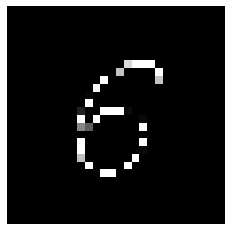

[1239.1487]
(28, 28, 1)


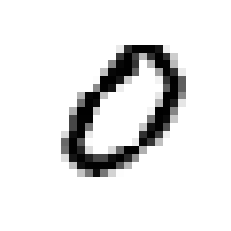

[6644.46]


In [14]:
reconstruct_loss('img1.png')
reconstruct_loss('img2.png')

### 2.0 - Image Denoising

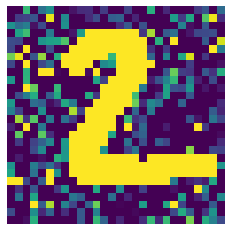

In [35]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

#Print one image to see the noise
plt.axis('off')
plt.imshow(x_test_noisy[1].reshape(28, 28))

In [42]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D

In [41]:
input_img = Input(shape=(28, 28, 1))

nn = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
nn = MaxPooling2D((2, 2), padding='same')(nn)
nn = Conv2D(32, (3, 3), activation='relu', padding='same')(nn)
encoded = MaxPooling2D((2, 2), padding='same')(nn)

In [43]:
nn = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
nn = UpSampling2D((2, 2))(nn)
nn = Conv2D(32, (3, 3), activation='relu', padding='same')(nn)
nn = UpSampling2D((2, 2))(nn)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(nn)

In [ ]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta',loss='binary_crossentropy')
autoencoder.fit(x_train_noisy, x_train, epochs=50, batch_size=256, validation_data=(x_test_noisy, x_test))

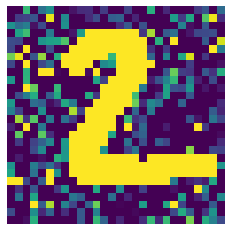

In [47]:
plt.axis('off')
plt.imshow(x_test_noisy[1].reshape(28, 28, 1))

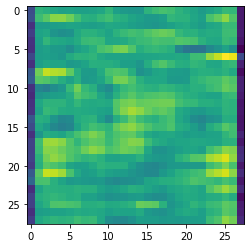

In [61]:
plt.imshow(autoencoder(x_test_noisy[1].reshape(28, 28, 1)).numpy()[:,:,3,0])

In [55]:
autoencoder(x_test_noisy[1].reshape(28, 28, 1)).numpy().shape

(28, 28, 4, 1)

In [57]:
autoencoder(x_test_noisy[1].reshape(28, 28, 1)).numpy()[:,:,0,0]

array([[0.52299565, 0.5275415 , 0.5279443 , 0.52839226, 0.5276591 ,
        0.5263655 , 0.5254713 , 0.5241307 , 0.52371466, 0.5225952 ,
        0.52127343, 0.52157557, 0.52165437, 0.5230849 , 0.52537054,
        0.5271509 , 0.52750915, 0.52743304, 0.5269762 , 0.5260603 ,
        0.525807  , 0.5240635 , 0.5226768 , 0.52305514, 0.5235191 ,
        0.5263374 , 0.5292533 , 0.52082646],
       [0.521373  , 0.5267867 , 0.52817756, 0.5302077 , 0.5312805 ,
        0.5298684 , 0.5283164 , 0.52599365, 0.52492017, 0.5240138 ,
        0.5234373 , 0.5239368 , 0.5241763 , 0.5242414 , 0.5237838 ,
        0.5239144 , 0.5235588 , 0.52356577, 0.5242307 , 0.52563727,
        0.525706  , 0.52607733, 0.52782863, 0.52862185, 0.52923757,
        0.529293  , 0.52923495, 0.5198048 ],
       [0.52157384, 0.52573997, 0.52622557, 0.5275212 , 0.5274877 ,
        0.52689934, 0.52607507, 0.52467966, 0.524191  , 0.52352494,
        0.522913  , 0.5235124 , 0.5239966 , 0.52440304, 0.52468574,
        0.52455646, 0.5241